# 2 Relativistic Gravity Tunnel


In this chapter we are going to study the gravitational tunnel problem in more extended situations: electrostatic, special relativity (as applies to an electrically charged sphere) and general relativity. This last one serves as an introduction to the more complex neutron star case, which will be developed on the next chapter.

If we consider massive objects like neutron stars, the classical result would predict a maximum velocities that increase with mass and decrease with radius as

\begin{equation}
    v_M = \sqrt{G M/R}
\end{equation}

Let's put some numbers on this to check the validity of the result in a bigger frame

In [1]:
import numpy as np

G = 6.6738e-11
c = 3e8

#Masses
M_Earth = 5.9724e24
M_Jupiter = 2e27
M_Sun = 2e30
M_NSn = 0.6*M_Sun
M_NSnpe = 0.7*M_Sun

#Radii
R_Earth = 6.371e6
R_Jupiter = 7e7
R_Sun = 7e8
R_NSn = 9.2e3
R_NSnpe = 9.14e3

def vmax(M, R):
    v = np.sqrt(G*M/R)/c
    return v

vE = "{:.2e}".format(vmax(M_Earth, R_Earth))
vJ = "{:.2e}".format(vmax(M_Jupiter, R_Jupiter))
vS = "{:.2e}".format(vmax(M_Jupiter, R_Jupiter))
vNS = round(vmax(M_NSn, R_NSn) , 3)
vNS2 = round(vmax(M_NSnpe, R_NSnpe) , 3)


print("Earth:  ", vE)
print("Jupiter:", vJ)
print("Sun:    ", vS)
print("NS n:   ", vNS)
print("NS npe: ", vNS2)

#Tunneling time
def T0(R,M):
    return np.pi*np.sqrt(R**3/(G*M))/60

print(T0(R_Earth, M_Earth))

Earth:   2.64e-05
Jupiter: 1.46e-04
Sun:     1.46e-04
NS n:    0.311
NS npe:  0.337
42.17440776698293


As we can see, the velocities reached in the cases of Neutron star are already relativistic, so a relativistic extension has to be done.

## 2.1 Electrostatic Train


The case of an electrically charge sphere, which we can call \textit{electrostatic tunnel}), is almost identical to the newtonian case. Let us begin by Coulombs law in Gauss law:

\begin{equation}
    \vec{F} = \frac{Q(r) q}{r^2} \hat{r},
    \label{2 - Coulomb's law}
\end{equation}
where $Q(r)$ is the charge distribution of the sphere and $q$ that of a test charge. From the second law directly, for a uniformly charged sphere,


\begin{equation*}
    \frac{Q(r) q}{r^2} = \frac{4\pi}{3} r  \rho_e q = m \ddot{r}, 
\end{equation*}
if the charges are of opposite sign, we have a harmonic oscillator with period

\begin{equation*}
    T_Q = \sqrt{\frac{3 \pi m}{| \rho_e q |}}.
\end{equation*}

Let's fix some of this quantities

In [1]:
#Neutron Star
m = 1000 #in kg
R = 1.2e3 #in m
Q = 1e+38 # in C
rho_e = 6e+23 #in C/m3

now use them to compute traversal times and velocities at the center as a function of q

In [2]:
import numpy as np

k = 8.988e9 #In Nm2/C2

def T(rho, q, m):
    return np.sqrt(3*np.pi*m/(k*rho*q))


def V(Q, q, m, R):
    return np.sqrt(2*k*Q*q/(m*R))

#Let's comute T and V for this Neutron star and test objects objects 



now, we can plot them

In [2]:
import matplotlib.pyplot as plt  

q = np.arange(1,10,0.1)

Time = T(rho_e, q, m)*10**15 #in s
Velocity = V(Q, q, m, R)/3e8 # m/s

ax1 = plt.subplot()
plt.xlabel('$q \ [ C ]$')
plt.ylabel('$T \ [fs]$', color='b')
plt.plot(q, Time, 'b', label='$T_Q$')

ax2 = ax1.twinx()
plt.ylabel('$v \ [c]$', color='g')
ax2.plot(q, Velocity, 'g', label='$v$')


plt.savefig('Plots/1-Electrostatic_times_py.pdf')

NameError: name 'T' is not defined

For this parameters

In [7]:
print('Density = ', rho_e, 'C/m^3')
print('Q = ', Q, ' C')
print('q = ', q[0], ' C')
print('m = ', m, ' kg')
print('R = ', R, ' m')

Density =  6e+23 C/m^3
Q =  1e+39  C
q =  1.0  C
m =  1000  kg
R =  1200.0  m


as it can be seen, the velocity when the train is passing through the center of the sphere is much bigger than the speed of light, which, as we know, is absolutely impossible. 

## 2.2 Special Relativistic GT



We start again from force consideration, in this case Lorentz 4-force, written in explicit covariant form 

\begin{equation}
F^{\mu} = m \frac{d^2 x^{\mu}}{d\tau^2} = q F^{\mu \nu} U_{\nu} ,
\end{equation}
From this section and the rest of this work, we are going to consider $c=1$, and work in natural units. In $1D$, the components are

\begin{equation}
    \left \{ \begin{matrix}
    m \frac{d^2 x^0}{d\tau^2} = q E^1 U^1 ,\\
    m \frac{d^2 x^1}{d\tau^2} = q E^1 U^0 .\\
    \end{matrix} \right. 
\end{equation}

We couple this equations and get to


\begin{equation}
    m \frac{d^2 x^1}{d\tau^2 } = - \omega^2 E x^1 + \frac{m}{2} \omega^4 (x^1)^3.
\end{equation}

we can solve it numerically using

\begin{equation*}
    \hat{\tau} = \omega \tau \hspace{0.5cm} , \hspace{0.5cm}  \hat{x} = \frac{\omega x^1}{x} \hspace{0.5cm} , \hspace{0.5cm} \hat{E} = \frac{E}{m} = \gamma + \frac{V}{m}.
\end{equation*}
$V$ is the potential energy, and we have also the relations

\begin{align*}
    \hat{E} = 1 + \frac{1}{2}\hat{R}^2 \hspace{1.cm} ;& \hspace{0.4cm} \hat{R} = \omega R= v_{NR max} = \sqrt{\frac{qQ/R}{m}}. \\
    \text{and} &\\
    \hat{R}= \sqrt{2(\hat{E} - 1)} \hspace{0.6cm} & , \hspace{0.6cm} \hat{R}_+ = \sqrt{4 + \hat{R}^2} .  
\end{align*}

With the above parameters, this quantities are:

In [22]:
omega = np.sqrt(1*Q/(m*R**3)) 
print("omega = ", omega, 's^-1')

Rhat = R*omega
print('Rhat  = ', Rhat)

Rplus = np.sqrt(4 + Rhat**2)
print('R+    = ', Rplus)

E = 1 + 0.5*Rhat**2
print('E     = ', E)

omega =  7607257743127.307 s^-1
Rhat  =  9128709291752768.0
R+   =  9128709291752768.0
E    =  4.166666666666666e+31


### Energy Considerations

 Duffing equation is a force equation. Let's fin then the energetic expression of this system. To that end, multiplying it by $d\hat{x}/d\hat{\tau}$, and integrate 
    
\begin{equation*}
        \int \frac{d^2 \hat{x}}{d\tau^2} \frac{d \hat{x}}{d\tau} d\tau = - \hat{E} \int  \hat{x}\frac{d\hat{x}}{d\tau} d\tau  + \frac{1}{2} \int \hat{x}^3  \frac{d \hat{x}}{d\tau} d\tau  ,
\end{equation*}

so we get

\begin{equation}
    \frac{1}{2}   \left( \frac{d\hat{x}}{d\tau}\right )^2 + V_{\text{eff}}^{SR} (\hat{x} ) = \text{Const} ,
\end{equation}

where the relativistic effective potential is

\begin{equation}
        V_{\text{eff}}^{SR} = \frac{1}{2} \hat{E}  \hat{x}^2 - \frac{1}{8} \hat{x}^4 = \frac{1}{2} \left( 1 + \frac{1}{2} \hat{R}^2 \right) \hat{x}^2 - \frac{1}{8} \hat{x}^4 ,
\end{equation}

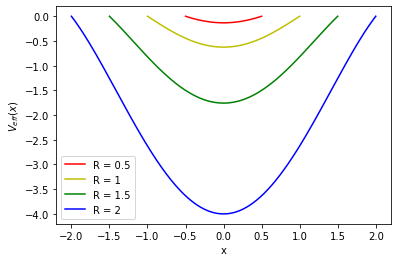

In [12]:
import scipy.special as spy
from scipy.integrate import odeint as ode

R1, R2, R3, R4 = 0.5, 1.0, 1.5, 2.0 

#Effective potential
def V(x, R):
    E = 1 + 0.5*R*R
    return 0.5*E*x**2 - 0.125*x**4 

def Plot_potentials():
    x1 = np.arange(-0.5,0.51,0.01)
    x2 = np.arange(-1  ,1.01,0.01)
    x3 = np.arange(-1.5,1.51,0.01)
    x4 = np.arange(-2  ,2.01,0.01)
    y1 = V(x1, R1) - V(R1, R1)
    y2 = V(x2, R2) - V(R2, R2)
    y3 = V(x3, R3) - V(R3, R3)
    y4 = V(x4, R4) - V(R4, R4)
    
    
    plt.xlabel('x')
    plt.ylabel('$V_{eff}(x)$')
    plt.plot(x1, y1, 'r', label='R = 0.5')
    plt.plot(x2, y2, 'y', label='R = 1')
    plt.plot(x3, y3, 'g', label='R = 1.5')
    plt.plot(x4, y4, 'b', label='R = 2')
    plt.legend()
    #plt.savefig("Plots/2-Effecive_Potential_SR_py.pdf")
    
Plot_potentials()

### Proper Velocity

To find the proper velocity, notice that, at the turning points, 
    
\begin{equation*}
    0 + \frac{1}{2} \hat{R}^2 + \frac{1}{8} \hat{R}^4 = \frac{1}{8} \hat{R}^2 \hat{R}_+^2 = \text{Const} ,
\end{equation*}

Here we have it

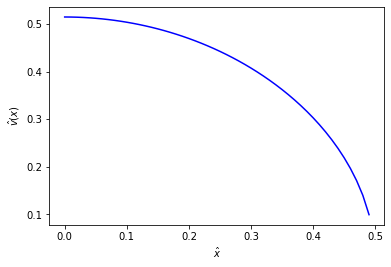

In [93]:
def v(x, R):
    Rp = np.sqrt(4 + R*R)
    return 0.5*np.sqrt(R**2*Rp**2 - (R**2 + Rp**2)*x**2 + x**4 )

def Plot_velocity():
    x1 = np.arange(0,R1,0.01)
    v1 = v(x1, R1)
    
    plt.xlabel('$\hat{x}$')
    plt.ylabel('$\hat{v} (x)$')    
    plt.plot(x1, v1, 'b')
    #plt.savefig("Plots/3-Proper_velocity_py.pdf")

Plot_velocity()

### Proper Trajectory

The functional form is

\begin{equation*}
    \hat{x} = \hat{R} \text{sn} \left (\frac{\hat{R}_+}{2} \hat{\tau} , \frac{\hat{R}}{\hat{R}_+} \right),
\end{equation*}

where $ sn (x,y)$ is Jacobi elliptic function. This solutions, for the first oscillation periods,

<ipython-input-94-628fa3263d1d>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()


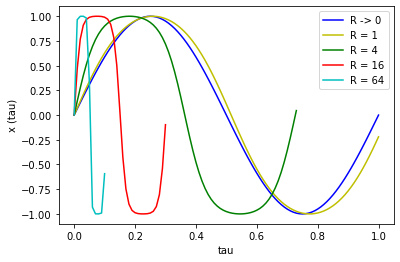

In [94]:

def tau(x, R):
    Rp = np.sqrt(4 + R*R)
    F = spy.ellipkinc(x/R, R/Rp)
    return 2/Rp*F

def Plot_tau():
    x1 = np.arange(0,R1,0.01)
    tau1 = tau(x1, R1)
    
    plt.xlabel('$\hat{x}$')
    plt.ylabel('$\hat{\tau} (x)$')    
    plt.plot(x1, tau1, 'r')

    
def x(t, R):
    Rp = np.sqrt(4 + R*R)
    sn = spy.ellipj(np.pi*Rp*t , R/Rp )
    return sn[0]

def Plot_Prop_Trajectory():
    tau1 = np.arange(0,1.01,0.01)
    tau2 = np.arange(0,1.01,0.01)
    tau3 = np.arange(0,.74,0.01)
    tau4 = np.arange(0,.306,0.01)
    tau5 = np.arange(0,.11,0.01)
    Trajec1 = x(tau1, 0.0)
    Trajec2 = x(tau2, 1)
    Trajec3 = x(tau3, 4)
    Trajec4 = x(tau4, 16)
    Trajec5 = x(tau5, 64)
    
    
    plt.xlabel('tau')
    plt.ylabel('x (tau)')    
    plt.axes()
    plt.plot(tau1, Trajec1, 'b', label='R -> 0')
    plt.plot(tau2, Trajec2, 'y', label='R = 1')
    plt.plot(tau3, Trajec3, 'g', label='R = 4')
    plt.plot(tau4, Trajec4, 'r', label='R = 16')
    plt.plot(tau5, Trajec5, 'c', label='R = 64')
    plt.legend()    
    #plt.savefig("Plots/1-SRel_Traj__Prop.pdf")

Plot_Prop_Trajectory()

## Coordinate Trajectory

For the coordinate time $t$, we have

\begin{equation*}
    \frac{d \hat{t}}{d\hat{x}} = \frac{\gamma }{\hat{v}},
\end{equation*}

and, as $\gamma = \sqrt{1 + \hat{\omega}^2}$, we have

\begin{equation*}
    \frac{d \hat{x}}{d\hat{t}} = \sqrt{ 1 + \frac{1}{\hat{v}^2}} = \sqrt{ 1 - \frac{1}{(\hat{E} - \frac{1}{2} \hat{x}^2)^2}} ,
\end{equation*}

In [14]:
def Coordinate_times(x, R, tau):
    Rp = np.sqrt(4 + R*R)
    E = spy.ellipeinc(x/R, R/Rp)
    F = spy.ellipkinc(x/R, R/Rp)
    return Rp*E - 2/Rp*F - tau


def Coordinate_Trajectory(x, t, R):
    E = 1 + 0.5*R*R
    dxdt = np.sqrt(1 - 1/(E - 0.5*x**2)**2)
    return dxdt


def Solve_trajectory(trajectory, t_array, x0, R, N):
    solution = ode(trajectory, x0, t_array, args=(R,))

    r = np.zeros(N)
    for i in np.arange(N):
        r[i] = solution[i]

    return r


def Plot_Coord_trajectory(t,x, color, name):
    
    plt.xlabel('$\hat{t}$')
    plt.ylabel('$\hat{x} (t)$')
    
    plt.plot(t, x, color, label=name)
    plt.legend()
    plt.axhline(color='black', lw=0.1)
    plt.savefig("Plots/6-Coordinate_Trajectory_py.pdf")    

### Main parameters

In [10]:
# Initial conditions and step
ti, dt = 0, 0.01
xi =  0.0

#Arrays for the 4 cases
R = np.array([0.25,1,2,4])
tf = np.array([1.57,1.85,2.5,4.25])
N = tf/dt

t0 = np.arange(ti, tf[0]+dt, dt)
t1 = np.arange(ti, tf[1]+dt, dt)
t2 = np.arange(ti, tf[2]+dt, dt)
t3 = np.arange(ti, tf[3]+dt, dt)

**Plotting trajectories**

<ipython-input-14-479b368c5b52>:10: RuntimeWarning: invalid value encountered in sqrt
  dxdt = np.sqrt(1 - 1/(E - 0.5*x**2)**2)


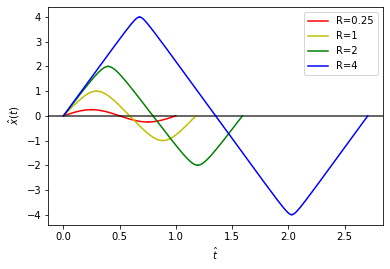

In [15]:
#########################   R = 0.25  #################################
Radius = R[0] 
Trajectory = Coordinate_Trajectory

t = t0
n = int(N[0])
tf = t[n]


x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#for i in range(n):
    #print(t[i], ' ', x[i])

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

#Plots
Plot_Coord_trajectory(tau1, x,'r','R=0.25')
Plot_Coord_trajectory(tau2, x,'r','')
Plot_Coord_trajectory(tau3, -x,'r','')
Plot_Coord_trajectory(tau4, -x,'r','')

#########################   R = 1  #################################
Radius = R[1] 
Trajectory = Coordinate_Trajectory

t = t1
n = int(N[1])
tf = t[n]


x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)


#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

#Plots
Plot_Coord_trajectory(tau1,  x,'y','R=1')
Plot_Coord_trajectory(tau2,  x,'y','')
Plot_Coord_trajectory(tau3, -x,'y','')
Plot_Coord_trajectory(tau4, -x,'y','')

#########################   R = 2  #################################

Radius = R[2] 
Trajectory = Coordinate_Trajectory

t = t2
n = int(N[2])
tf = t[n]


x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)


#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

#Plots
Plot_Coord_trajectory(tau1,  x,'g','R=2')
Plot_Coord_trajectory(tau2,  x,'g','')
Plot_Coord_trajectory(tau3, -x,'g','')
Plot_Coord_trajectory(tau4, -x,'g','')

#########################   R = 4  #################################
Radius = R[3] 
Trajectory = Coordinate_Trajectory

t = t3
n = int(N[3])
tf = t[n]


x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)


#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

#Plots
Plot_Coord_trajectory(tau1,  x,'b','R=4')
Plot_Coord_trajectory(tau2,  x,'b','')
Plot_Coord_trajectory(tau3, -x,'b','')
Plot_Coord_trajectory(tau4, -x,'b','')

## 2.3 General Relativistic GT


### 2.3.1 Weak Field limit

In the weak limit, proper time is given by the following formula

\begin{equation}
     \tau_0 = T_0  \left(1 - \frac{1}{4} \frac{R_s}{R} \right )
\end{equation}

where $T_0$ is the classical traversal time, and $R_s = GM/c^2$ is the Schwarschild radius. Proper time is therefore

In [24]:
c = 2.99792458e8
tau0 = T0(R_Earth, M_Earth)*(1 - 0.25*G*M_Earth/(R_Earth*c**2))
tau_min = round(tau0)
tau_s = (tau0-42)*60
print("tau0: ", tau_min, " min ", tau_s, "s")

tau0:  42  min  10.464465578610458 s


While the coordinate time is given by

\begin{equation}
    t' = \left (1 - \frac{\Delta \Phi}{c^2} \right) \tau
\end{equation}

numerically:

In [27]:
tprime = (1 - G*M_Earth/(R_Earth*c**2))*tau0
t_min = round(tprime)
t_s = (tprime-42)*60

print("t': ", t_min, "min ", t_s, " s")

t':  42 min  10.464463817148442  s


with a difference of

In [30]:
print((tau0 - tprime)*10**9)

29.35770027079343


### 2.3.2 Schwarzschild metric

consider Schwarzschild's interior metric

\begin{equation}
    ds^2 = - \left( \frac{3}{2} \sqrt{ 1 - 2 \hat{R}^2 } - \frac{1}{2} \sqrt{1 - 2 r^2} \right)^2 c^2 dt^2 + \frac{dr^2}{1 - 2 r}
\end{equation}

where we have dropped the angular dependence because of the clear symmetry of the problem, and in this case the non dimensional radius is


\begin{equation*}
    \hat{R} = \frac{\omega}{c} R = \sqrt{\frac{GM}{c^2 R}}.
\end{equation*}


### Null trajectory

Let's consider first the simplest of all cases for this situation, i.e., that of a massless particle. For this, $ds^2 = 0$, so can find the trajectory as

\begin{equation*}
    \frac{dr}{dt} = \frac{3}{2} \sqrt{(1-2r^2)(1-2R^2)} + r^2 - \frac{1}{2} \\
    \int \frac{dr}{\frac{3}{2} \sqrt{(1-2r^2)(1-2R^2)} + r^2 - \frac{1}{2}} = \int dt \\
    \frac{1}{\sqrt{4 - 9R^2}}\arctan{\left [ \frac{r \sqrt{4-9R^2}\left(1 + 3\sqrt{(1-2r^2)(1-2R^2)} \right)}{4 - 9R^2 - 9r^2 (1- 2R^2)} \right] }= t,
\end{equation*}

Which we can solve with Python

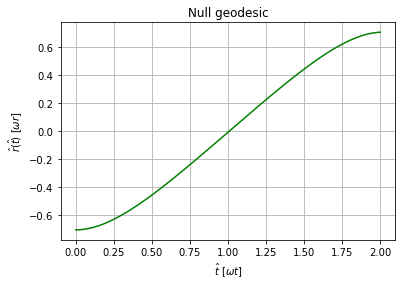

In [164]:
def Null_Trajectory(x, t, R):
    dxdt = 1.5*np.sqrt((1 - 2*x**2)*(1 - 2*R**2)) + x**2 - 0.5
    return dxdt

def Solve_trajectory(trajectory, t_array, x0, R, N):
    solution = ode(trajectory, x0, t_array, args=(R,))

    r = np.zeros(N)
    for i in np.arange(N):
        r[i] = solution[i]

    return r

def Plot_Null_trajectory(t, x):
    plt.title('Null geodesic')
    plt.xlabel('$\hat{t} \ [\omega t] $')
    plt.ylabel('$\hat{r}(\hat{t}) \ [\omega r] $')
    plt.plot(t, x, 'g')
    plt.grid()
    plt.savefig("Plots/7-Null_Trajectory_py.pdf")

#Integration interval, step and number of steps
t0, tf, dt = 0, 2, 0.01
t = np.arange(t0, tf+dt, dt) 
N = int((tf-t0)/dt)

#Initial conditions
R = [0.2,0.4,0.6,2/3]
x0 =  -1/np.sqrt(2)
    
x = np.zeros([N,3])
Trajectory = Null_Trajectory

x = Solve_trajectory(Trajectory, t, x0, R[0], N+1)

Plot_Null_trajectory(t,x)


## Massive Trajectories

### Effective Potential

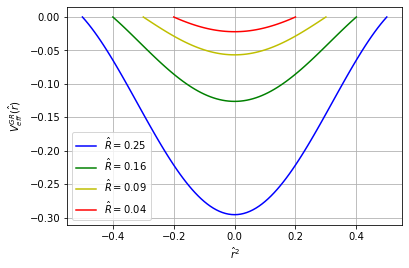

In [7]:

def V(r,R):
    E = np.sqrt(1-2*R**2)
    x = np.sqrt(1-2*r**2)/E
    return -0.5*pow(E*x,2)*( (5-x)*(x-1)/(x-3)**2)

    
R1, R2, R3, R4 = 0.5, 0.4, 0.3, 0.2
x1 = np.arange(-0.5,0.51,0.01)
x2 = np.arange(-0.4,0.41,0.01)
x3 = np.arange(-0.3,0.31,0.01)
x4 = np.arange(-0.2,0.21,0.01)
y1 = V(x1, R1) - V(R1, R1)
y2 = V(x2, R2) - V(R2, R2)
y3 = V(x3, R3) - V(R3, R3)
y4 = V(x4, R4) - V(R4, R4)

plt.xlabel('$\hat{r}^2$')
plt.ylabel('$V_{eff}^{GR}(\hat{r})$')
plt.plot(x1, y1, 'b', label='$\hat{R} = 0.25$')
plt.plot(x2, y2, 'g', label='$\hat{R} = 0.16$')
plt.plot(x3, y3, 'y', label='$\hat{R} = 0.09$')
plt.plot(x4, y4, 'r', label='$\hat{R} = 0.04$')
plt.grid()
plt.legend()
plt.savefig("Plots/8-Effecive_Potential_GR_py.pdf")

### Trajectory

In this case the equation to solve is


\begin{equation*}
    \frac{dr}{d\tau} = \hat{E} x \frac{\sqrt{(5-x)(x-1)}}{x-3},
\end{equation*}

with 

\begin{equation*}
    x = \frac{\sqrt{1-2r^2}}{E^2}  = \frac{\sqrt{1 - 2 r^2}}{1 - 2 R^2}.
\end{equation*}

here we implement it

### Main functions

In [28]:
def Massive_Trajectory(r , t, R):
    E = np.sqrt(1-2*R**2)
    x = np.sqrt(1-2*r**2)/E
    drdt = E*x*np.sqrt((5-x)*(x-1))/(3-x)
    return drdt

def Solve_trajectory(trajectory, t_array, x0, R, N):
    solution = ode(trajectory, x0, t_array, args=(R,))

    r = np.zeros(N)
    for i in np.arange(N):
        r[i] = solution[i]

    return r
    
def Plot_Massive_trajectory(t, x, color, name):
    plt.xlabel('$ \\tau $')
    plt.ylabel('$\hat{r}^2 $')
    plt.plot(t, x, color, label=name)
    plt.axhline(color='black', lw=0.1)
    plt.grid()
    plt.legend()
    plt.savefig("Plots/9-Massive_Trajectory_py.pdf")

### Main parameters

In [29]:
# Initial conditions and step
ti, dt = 0, 0.005
xi =  0.0

#Arrays for the 4 cases
R = np.array([0.2,0.4,0.6,2/3])
tf = np.array([1.5,1.35,1.0,0.5])
N = tf/dt#int((tf-ti)/dt)

t0 = np.arange(ti, tf[0]+dt, dt)
t1 = np.arange(ti, tf[1]+dt, dt)
t2 = np.arange(ti, tf[2]+dt, dt)
t3 = np.arange(ti, tf[3]+dt, dt)

**Plotting Trajectories**

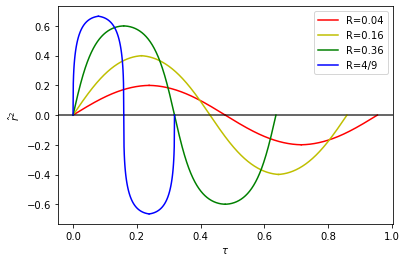

In [30]:
#########################   R = 0.2  #################################
Radius = R[0] 
Trajectory = Massive_Trajectory

t = t0
n = int(N[0])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1, x,'r','R=0.04')
Plot_Massive_trajectory(tau2, x,'r','')
Plot_Massive_trajectory(tau3, -x,'r','')
Plot_Massive_trajectory(tau4, -x,'r','')

#########################   R = 0.4  #################################
Radius = R[1] 
t = t1
n = int(N[1])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1, x,'y','R=0.16')
Plot_Massive_trajectory(tau2, x,'y','')
Plot_Massive_trajectory(tau3, -x,'y','')
Plot_Massive_trajectory(tau4, -x,'y','')

#########################   R = 0.6  #################################
Radius = R[2] 


t = t2
n = int(N[2])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1, x,'g','R=0.36')
Plot_Massive_trajectory(tau2, x,'g','')
Plot_Massive_trajectory(tau3, -x,'g','')
Plot_Massive_trajectory(tau4, -x,'g','')



#########################   R = 2/3  #################################
Radius = R[3] 

t = t3
n = int(N[3])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1,  x,'b','R=4/9')
Plot_Massive_trajectory(tau2,  x,'b','')
Plot_Massive_trajectory(tau3, -x,'b','')
Plot_Massive_trajectory(tau4, -x,'b','')

### Coordinate Trajectory


For this case, the respective equation is

\begin{equation}
    \frac{d\hat{t}}{d\hat{r}} = \frac{4}{\hat{E}^2 x(3-x)\sqrt{(5-x)(x-1)}},
\end{equation}

and its solution is shown next



In [25]:
def Massive_Coord_Trajectory(r , t, R):
    E = np.sqrt(1-2*R**2)
    x = np.sqrt(1-2*r**2)/E
    drdt = (E**2*x*(3-x)*np.sqrt((5-x)*(x-1)))/4
    return drdt

def Solve_trajectory(trajectory, t_array, x0, R, N):
    solution = ode(trajectory, x0, t_array, args=(R,))

    r = np.zeros(N)
    for i in np.arange(N):
        r[i] = solution[i]

    return r
    
def Plot_Massive_Coord_trajectory(t, x, color, name):
    plt.xlabel('$  t  $')
    plt.ylabel('$\hat{r}  $')
    plt.plot(t, x, color, label=name)
    plt.axhline(color='black', lw=0.1)
    plt.legend()
    plt.savefig("Plots/11-Massive_Coord_Trajectory_py.pdf")

In [26]:
# Initial conditions and step
ti, dt = 0, 0.001
xi =  0.0

#Arrays for the 4 cases
R = np.array([0.2,0.4,0.6,0.662])
tf = np.array([1.37,1.82,3.25, 12.5])
N = tf/dt#int((tf-ti)/dt)

t0 = np.arange(ti, tf[0]+dt, dt)
t1 = np.arange(ti, tf[1]+dt, dt)
t2 = np.arange(ti, tf[2]+dt, dt)
t3 = np.arange(ti, tf[3]+dt, dt)

<ipython-input-25-48dd1b3161e7>:4: RuntimeWarning: invalid value encountered in sqrt
  drdt = (E**2*x*(3-x)*np.sqrt((5-x)*(x-1)))/4
<ipython-input-25-48dd1b3161e7>:4: RuntimeWarning: invalid value encountered in sqrt
  drdt = (E**2*x*(3-x)*np.sqrt((5-x)*(x-1)))/4


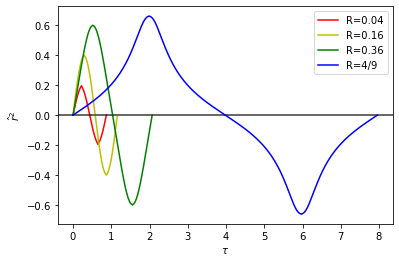

In [27]:
#########################   R = 0.2  #################################
Radius = R[0] 
Trajectory = Massive_Coord_Trajectory

t = t0
n = int(N[0])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1, x,'r','R=0.04')
Plot_Massive_trajectory(tau2, x,'r','')
Plot_Massive_trajectory(tau3, -x,'r','')
Plot_Massive_trajectory(tau4, -x,'r','')


#########################   R = 0.4  #################################
Radius = R[1] 
t = t1
n = int(N[1])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1, x,'y','R=0.16')
Plot_Massive_trajectory(tau2, x,'y','')
Plot_Massive_trajectory(tau3, -x,'y','')
Plot_Massive_trajectory(tau4, -x,'y','')



#########################   R = 0.6  #################################
Radius = R[2] 


t = t2
n = int(N[2])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1, x,'g','R=0.36')
Plot_Massive_trajectory(tau2, x,'g','')
Plot_Massive_trajectory(tau3, -x,'g','')
Plot_Massive_trajectory(tau4, -x,'g','')



#########################   R = 2/3  #################################
Radius = R[3] 

t = t3
n = int(N[3])
tf = t[n]

x = Solve_trajectory(Trajectory, t, xi, Radius, n+1)

#Intervals
tau1 = t/(2*np.pi)
tau2 = (-t+2*tf)/(2*np.pi)
tau3 = (t+2*tf)/(2*np.pi)
tau4 = (-t+4*tf)/(2*np.pi)

# Plots
Plot_Massive_trajectory(tau1,  x,'b','R=4/9')
Plot_Massive_trajectory(tau2,  x,'b','')
Plot_Massive_trajectory(tau3, -x,'b','')
Plot_Massive_trajectory(tau4, -x,'b','')


### Numbers

To put some numbers to the above formulas and concepts, lets consider a few real cases:

| **Body** | $m [kg] $ | $R  [ m] $ | $\hat{R} $ |
| -------- | --------  | ---------- | ---------- |
| Earth    | 5.972e24  | 6.371e6    |  6.9e-10    |
| Sun      | 1.989e30  | 6.963e9    |  2.1e-7     |
| NS       | 1.3 $M_s$ | 10000      |  0.192     |

with these we can compute non-dimesional proper and coordinate times. With *Mathematica*, we got


| **Body** | $\hat{\tau}  $ | $  \hat{t}  $ | 
| -------- | --------  | ---------- | 
| Earth    | 1.5703  | 1.5703    | 
| Sun      | 1.5707  | 1.5707    | 
| NS       | 1.3575 | 1.9967     | 

as $\hat{t} = \omega t $, it is easy to compute the dimensionalised times in seconds


| **Body** | $\tau [s]  $ | $  t [s]  $ | 
| -------- | --------  | ---------- | 
| Earth    | 1.5703  | 1.5703    | 
| Sun      | 1.5707  | 1.5707    | 
| NS       | 1.3575 | 1.9967     | 

In [6]:
c = 2.99792e8
G = 6.67e-11

def Rhat(R,M):
    Rs = G*M/c**2
    return Rs/R

RhatE = Rhat(6.371e6, 5.972e24)
RhatS = Rhat(6.93e9, 1.989e30)
RhatNS = Rhat(10000,1.3*1.989e30)

print("Non dimensional radii:")
print(RhatE, '\t', RhatS, '\t' , RhatNS)
"""
print("Dimensional times")
tE = 1.5703/omega(6.371e6, 5.972e24)
tS = 1.5707/omega(6.93e9, 1.989e30)
tauNS = 1.3575/omega(10000,1.3*1.989e30)
tNS = 1.9967/omega(10000,1.3*1.989e30)

print(tE/30, 'min \t', tS/30, ' min \t', 2*1000*tauNS , ' ms \t', 2*1000*tNS, ' ms')"""


Non dimensional radii:
6.956614681826879e-10 	 2.1300377655205044e-07 	 0.19189510229574225


'\nprint("Dimensional times")\ntE = 1.5703/omega(6.371e6, 5.972e24)\ntS = 1.5707/omega(6.93e9, 1.989e30)\ntauNS = 1.3575/omega(10000,1.3*1.989e30)\ntNS = 1.9967/omega(10000,1.3*1.989e30)\n\nprint(tE/30, \'min \t\', tS/30, \' min \t\', 2*1000*tauNS , \' ms \t\', 2*1000*tNS, \' ms\')'